In [44]:
import pandas as pd 
import numpy as np 
import skimage.io 
import cv2 
import os
import auxiliar as ax
import display_embeding as dp
from os import listdir
from os.path import isfile, join
from pathlib import Path
import matplotlib.pyplot as plt 
from tqdm import tqdm 

In [2]:
AB_c = pd.read_csv('./HPC_results/matrix_distance_Comp.csv', index_col=0)
AB = pd.read_csv('./HPC_results/matrix_distance_AlexBio.csv', index_col=0)
AB_1 = pd.read_csv('./HPC_results/matrix_distance_AlexBio_1.csv', index_col=0)
AB_1 = pd.read_csv('./HPC_results/matrix_distance_AlexBio_1.csv', index_col=0)
AB_2 = pd.read_csv('./HPC_results/matrix_distance_AlexBio_2.csv', index_col=0)

# df = AB.combine_first(AB_c)
# df = df.combine_first(AB_2)
# df = df.combine_first(AB_1)
# df.to_csv('./HPC_results/embeding_distances.csv')

In [3]:
df = pd.read_csv(r'./HPC_results/embeding_distances.csv', index_col=0)
df

,04456d101.png,04805d38.png,04314d27.png,04661d145.png,04750d22.png,04638d11.png,04419d40.png,04402d136.png,04929d06.png,04831d90.png,...,04243d185.png,04762d02.png,04493d48.png,04914d06.png,04882d34.png,04560d105.png,04903d00.png,04730d02.png,04535d16.png,04297d289.png
04456d101.png,0.000000,1.124556,0.913641,1.084750,0.867742,1.488098,1.079993,0.828395,1.145159,0.843030,...,0.698054,1.093279,1.335912,1.377169,1.328397,1.224085,1.305788,1.427979,1.438792,0.887793
04805d38.png,1.124556,0.000000,1.252878,0.749359,0.976966,1.224425,0.814156,0.660675,1.228184,0.843189,...,1.576253,0.999968,1.272123,2.040159,1.202921,1.442219,2.088181,1.486213,1.009337,1.169135
04314d27.png,0.913641,1.252878,0.000000,1.135923,0.917492,1.200594,1.091471,0.936004,0.929913,0.876147,...,1.106424,1.146879,1.245821,1.701254,1.244104,0.954429,1.317079,1.562684,1.407924,0.824823
04661d145.png,1.084750,0.749359,1.135923,0.000000,0.762807,1.202242,0.872575,0.950195,1.082287,0.736074,...,1.114684,0.940321,0.654656,1.641644,1.293989,1.370311,1.878859,1.064974,1.256561,1.212701
04750d22.png,0.867742,0.976966,0.917492,0.762807,0.000000,1.514574,0.857137,0.787482,0.837329,0.809441,...,1.202244,1.026333,1.054698,1.882938,1.221805,1.149155,1.873367,1.267173,1.209825,0.966907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
04560d105.png,1.224085,1.442219,0.954429,1.370311,1.149155,1.945230,1.129949,1.402781,1.304620,1.344457,...,1.292760,0.639066,1.443971,1.535308,1.164257,0.000000,1.685961,1.433221,1.646125,0.989202
04903d00.png,1.305788,2.088181,1.317079,1.878859,1.873367,1.477504,1.894509,1.964195,1.769957,1.718643,...,1.313204,1.883674,2.017234,1.716980,1.706689,1.685961,0.000000,1.976575,1.889409,1.778626
04730d02.png,1.427979,1.486213,1.562684,1.064974,1.267173,2.011694,1.509718,1.530215,1.717312,1.429473,...,1.549929,1.509000,1.112354,2.088066,1.478290,1.433221,1.976575,0.000000,1.764612,1.666770
04535d16.png,1.438792,1.009337,1.407924,1.256561,1.209825,0.775299,0.802347,1.203982,1.072863,1.276161,...,1.701047,1.486322,1.252679,2.020317,1.273981,1.646125,1.889409,1.764612,0.000000,1.449476


In [4]:
df1 = df.replace(0, np.NaN)
idx = np.array(df1.index)[:,None]
idx_min = np.array(df1.idxmin(skipna=1))[:,None]
min_val = np.array(df1.min(skipna=1))[:,None]
photos = np.c_[idx, idx_min, min_val]
photos

array([['04456d101.png', '04456d34.png', 0.25774217],
       ['04805d38.png', '04805d12.png', 0.17672318],
       ['04314d27.png', '04314d57.png', 0.16416067],
       ...,
       ['04730d02.png', '04730d32.png', 0.2831681],
       ['04535d16.png', '04925d08.png', 0.3885279893875122],
       ['04297d289.png', '04297d102.png', 0.1063558906316757]],
      dtype=object)

In [5]:
id1 = np.array([i[0].split('d')[0] for i in idx])[:,None]

In [6]:
c = 0 
c_list = []
for i in idx_min:
    if type(i[0]) == float:
        print('Probelm', c)
        c_list.append(c)
    c += 1
print(c_list)

Probelm 664
[664]


In [7]:
idx_min[c_list[0]] = 'Notfound'

In [8]:
id2 = np.array([i[0].split('d')[0] for i in idx_min])[:,None]

In [10]:
ph_id = (id1 != id2)
ph_id.flatten()

array([False, False, False, ..., False,  True, False])

In [11]:
selected_ph = photos[ph_id.flatten(), :]
selected_ph[selected_ph[:,-1].argsort()]

df_photos = pd.DataFrame(selected_ph, columns=['id1', 'id2', 'emb_dist'])

In [12]:
df_photos.sort_values(by=['emb_dist']).head(10)

,id1,id2,emb_dist
26,04714d35.png,04540d107.png,0.185079
137,04540d107.png,04714d35.png,0.185079
33,04892d72.png,04922d12.png,0.236278
17,04507d356.png,04256d120.png,0.236988
119,04631d29.png,04764d10.png,0.26008
65,04650d128.png,04360d101.png,0.262468
64,04408d102.png,04422d50.png,0.265447
99,04752d04.png,04848d62.png,0.268253
116,04883d02.png,04881d00.png,0.271623
108,04649d14.png,04451d102.png,0.291277


In [13]:
morph5 = ['04540d107.png', '04714d35.png', '04557d102.png']

In [14]:
df.loc[morph5[:-1], ~df.columns.isin([morph5[:-1]])].sum().sort_values()

04876d62.png     0.000000
04540d107.png    0.185079
04714d35.png     0.185079
04540d95.png     0.450234
04708d81.png     0.512152
                   ...   
04515d74.png     3.766876
04635d11.png     3.792864
04505d146.png    3.823770
04635d31.png     3.965255
04780d02.png     4.118487
Length: 1440, dtype: float64

In [15]:
v = df1.loc[morph5[:-1]]
# 
# v[v!=0].sort_values()
v_idx = [i.split('d')[0] for i in v.columns]
v.columns = v_idx
v.loc[:, (v.columns != morph5[0].split('d')[0]) & (v.columns != morph5[1].split('d')[0])].sum().sort_values()

04876    0.000000
04708    0.512152
04557    0.578800
04708    0.638650
04760    0.663088
           ...   
04515    3.766876
04635    3.792864
04505    3.823770
04635    3.965255
04780    4.118487
Length: 1434, dtype: float64

In [14]:
v = df1.loc[morph5[:-1]]

v_idx = [i.split('d')[0] for i in v.columns]
v.columns = v_idx
df1.loc[morph5[:-1], (v.columns != morph5[0].split('d')[0]) & (v.columns != morph5[1].split('d')[0])].sum().sort_values().head(10)

04876d62.png     0.000000
04708d81.png     0.512152
04557d102.png    0.578800
04708d20.png     0.638650
04760d128.png    0.663088
04744d96.png     0.694919
04726d90.png     0.740574
04847d92.png     0.742111
04202d392.png    0.744368
04429d97.png     0.747224
dtype: float64

In [16]:
v = df1.loc[morph5]
v

,04456d101.png,04805d38.png,04314d27.png,04661d145.png,04750d22.png,04638d11.png,04419d40.png,04402d136.png,04929d06.png,04831d90.png,...,04243d185.png,04762d02.png,04493d48.png,04914d06.png,04882d34.png,04560d105.png,04903d00.png,04730d02.png,04535d16.png,04297d289.png
04540d107.png,1.015889,1.271425,0.948733,0.863597,1.085155,1.292151,1.067244,1.119432,1.199184,1.013308,...,1.093559,0.708955,1.037817,1.612717,0.859089,0.849198,1.534605,1.394669,1.243773,1.268932
04714d35.png,0.929739,1.123561,0.952561,0.855998,1.192631,1.322566,1.048881,1.092247,1.328623,1.085790,...,1.144909,0.751476,1.085882,1.655679,0.688814,0.910240,1.448786,1.428329,1.288444,1.295039
04557d102.png,1.007842,1.071159,1.111974,0.924129,1.302033,1.313919,1.027201,1.244851,1.406260,1.028590,...,1.274460,0.644301,1.217270,1.699488,0.876032,0.769053,1.422823,1.360665,1.151309,1.372567


In [17]:
v_idx = [i.split('d')[0] for i in v.columns]
v.columns = v_idx
df1.loc[morph5, (v.columns != morph5[0].split('d')[0]) & (v.columns != morph5[1].split('d')[0]) & (v.columns != morph5[2].split('d')[0])].sum().sort_values().head(10)


04876d62.png     0.000000
04708d81.png     0.963104
04202d392.png    0.988484
04726d90.png     0.992044
04202d544.png    1.112860
04744d96.png     1.125326
04847d92.png     1.125674
04711d103.png    1.137370
04832d46.png     1.150190
04708d20.png     1.173026
dtype: float64

In [18]:
v_idx = [i.split('d')[0] for i in v.columns]
v.columns = v_idx
df1.loc[morph5, ~v.columns.isin([i.split('d')[0] for i in morph5])].sum().sort_values().head(10)


04876d62.png     0.000000
04708d81.png     0.963104
04202d392.png    0.988484
04726d90.png     0.992044
04202d544.png    1.112860
04744d96.png     1.125326
04847d92.png     1.125674
04711d103.png    1.137370
04832d46.png     1.150190
04708d20.png     1.173026
dtype: float64

In [19]:
morph5.append('04708d81.png')


In [20]:
morph5

['04540d107.png', '04714d35.png', '04557d102.png', '04708d81.png']

In [21]:
df1.loc[morph5, ~v.columns.isin([i.split('d')[0] for i in morph5])].sum().sort_values().head(10)

04876d62.png     0.000000
04202d392.png    1.357166
04726d90.png     1.405303
04847d92.png     1.505614
04726d08.png     1.559342
04832d46.png     1.562773
04228d136.png    1.562949
04202d544.png    1.568237
04847d02.png     1.576539
04744d96.png     1.596595
dtype: float64

In [22]:
df.loc[morph5, morph5]

,04540d107.png,04714d35.png,04557d102.png,04708d81.png
04540d107.png,0.000000,0.185079,0.310582,0.246293
04714d35.png,0.185079,0.000000,0.268219,0.265859
04557d102.png,0.310582,0.268219,0.000000,0.450952
04708d81.png,0.246293,0.265859,0.450952,0.000000


In [23]:
df1.loc[morph5, (v.columns != morph5[0].split('d')[0]) & (v.columns != morph5[1].split('d')[0]) & (v.columns != morph5[2].split('d')[0]) & (v.columns != morph5[3].split('d')[0])].sum().sort_values().head(10)

04876d62.png     0.000000
04202d392.png    1.357166
04726d90.png     1.405303
04847d92.png     1.505614
04726d08.png     1.559342
04832d46.png     1.562773
04228d136.png    1.562949
04202d544.png    1.568237
04847d02.png     1.576539
04744d96.png     1.596595
dtype: float64

In [24]:
df.loc[morph5, morph5]

,04540d107.png,04714d35.png,04557d102.png,04708d81.png
04540d107.png,0.000000,0.185079,0.310582,0.246293
04714d35.png,0.185079,0.000000,0.268219,0.265859
04557d102.png,0.310582,0.268219,0.000000,0.450952
04708d81.png,0.246293,0.265859,0.450952,0.000000


In [25]:
mypath = r'./Morph/Morph_1/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles

['04540d107.png', '04714d35.png', 'Morph.bmp', 'Morph_1.fmp']

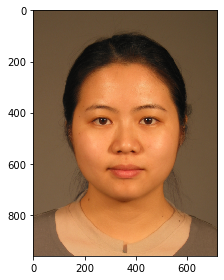

In [26]:
I = skimage.io.imread(mypath+onlyfiles[2])
skimage.io.imshow(I)

In [27]:
def compute_new_distances(reference_path, dataframe, savetag):
    
    # Obtain the files on the directory
    files = [f for f in listdir(reference_path) if isfile(join(reference_path, f)) and f.split('.')[1] != 'fmp' ]
    # Create a list to store the embeding distances

    
    images = []
    morphed = [f for f in files if  f.split('.')[1] != 'png']
    original = [f for f in files if  f.split('.')[1] == 'png']
    shape = None
    dist = np.zeros((len(morphed), len(files)))
    for i, mor in enumerate(morphed):

        for j, f in enumerate(files):
            s, _ = ax.comparefaces(reference_path+mor, reference_path+f)
            dist[i, j] = s
            if not i:
                im = cv2.imread(reference_path+f)
                position = ((int) (im.shape[1]/2 - 180), (int) (im.shape[0]/2 + 450))
                cv2.putText(
                    im, 
                    f, #text
                    position, #position at which writing has to start
                    cv2.FONT_HERSHEY_TRIPLEX, #font family
                    1.5, #font size
                    (0, 0, 0, 0), #font color
                    3) #font stroke

                images.append(im)
                if not None:
                    shape = im.shape
                if im.shape < shape:
                    shape = im.shape

            
            
    for i in range(len(images)):
        images[i] = images[i][:shape[0],:shape[1],:shape[2]]
    
    new_df = pd.DataFrame(dist[:,:len(original)], index=morphed, columns=files[:len(original)])
    df = dataframe.loc[original, original].append(new_df)
    df[morphed] = dist.T

    path = reference_path+"results/"
    Path(path).mkdir(parents=True, exist_ok=True)

    df.to_csv(path+savetag+'.csv')
    dp.similarity_image(images, df.values, path+savetag)
    
    
    return df


In [29]:
reference_path = r'./Morph/Morph_1/testmorph/'
df_m1 = compute_new_distances(reference_path, df, 'testmorph')

KeyError: "None of [Index(['04540d242.png', '04540d84.png', '04714d109.png', '04714d18.png'], dtype='object')] are in the [index]"

In [65]:
for i in range(1,7):
    reference_path = fr'./Morph/Morph_{i}/'
    compute_new_distances(reference_path, df, f'morph{i}')

In [63]:
reference_path = r'./Morph/Morph_1/testmorph/'
files = [f for f in listdir(reference_path) if isfile(join(reference_path, f))]
files


['04540d242.png', '04540d84.png', '04714d109.png', '04714d18.png', 'Morph.bmp']

In [132]:
def compute_new_distances(reference_path, savetag):
    
    # Obtain the files on the directory
    files = files = [f for f in listdir(reference_path) if isfile(join(reference_path, f))]
    # Create a list to store the embeding distances
    files2 = files.copy()
    
    images = []
    # morphed = [f for f in files if  f.split('.')[1] != 'png']
    # original = [f for f in files if  f.split('.')[1] == 'png']
    shapes = []

    new_df = pd.DataFrame(index=files, columns=files)
    
    for im1 in tqdm(files):
        
        im = cv2.imread(reference_path+im1)
        position = ((int) (im.shape[1]/2 - 180), (int) (im.shape[0]/2 + 450))
        cv2.putText(
            im, 
            im1, #text
            position, #position at which writing has to start
            cv2.FONT_HERSHEY_TRIPLEX, #font family
            1.5, #font size
            (0, 0, 0, 0), #font color
            3) #font stroke

        images.append(im)
        shapes.append(im.shape)
        
        for im2 in files2:
            s, _ = ax.comparefaces(reference_path+im1, reference_path+im2)
            new_df[im1][im2] = s
            new_df[im2][im1] = s
        files2.pop(0)
            
    shapes = min(shapes)   
    for i in range(len(images)):
        images[i] = images[i][:shapes[0],:shapes[1],:shapes[2]]
    
    path = reference_path+"results/"
    Path(path).mkdir(parents=True, exist_ok=True)

    new_df.to_csv(path+savetag+'.csv')
    dp.similarity_image(images, new_df.values, path+savetag)
    
    
    return new_df

In [135]:
reference_path = r'./Morph/Morph_6/testmorph/'
new_df = compute_new_distances(reference_path, 'testmorph')


100%|██████████| 5/5 [00:04<00:00,  1.06it/s]


In [167]:

df.loc['04540d107.png',:].sort_values().head(600)

04540d107.png    0.000000
04714d35.png     0.185079
04540d95.png     0.213729
04708d81.png     0.246293
04744d96.png     0.288438
                   ...   
04878d30.png     1.045561
04898d56.png     1.046772
04902d00.png     1.046866
04535d88.png     1.047895
04434d131.png    1.048358
Name: 04540d107.png, Length: 600, dtype: float64

In [98]:
matches = []
nonmatches = []
c = 0 

for idx in tqdm(df.index):
    for col in df.columns:
        if idx.split('d')[0] == col.split('d')[0]:
            if df[idx][col] != 0 :
                if not np.isnan(df[idx][col]):
                    matches.append(df[idx][col])
        else:
            if df[idx][col] != 0:
                if not np.isnan(df[idx][col]):
                    nonmatches.append(df[idx][col])



100%|██████████| 1440/1440 [00:41<00:00, 34.94it/s]


In [99]:
matches = np.array(matches)
nonmatches = np.array(nonmatches)
print(f'0 instances matches: {(matches == 0).sum()}')
print(f'NaN instances matches: {(matches == np.NaN).sum()}')
print(f'length matches: {len(matches)}')
print(matches[328])
print('')
print(f'0 instances nonmatches: {(nonmatches == 0).sum()}')
print(f'NaN instances nonmatches: {(nonmatches == np.NaN).sum()}')
print(f'length nonmatches: {len(nonmatches)}')


0 instances matches: 0
NaN instances matches: 0
length matches: 2750
0.23243818

0 instances nonmatches: 0
NaN instances nonmatches: 0
length nonmatches: 2066532


In [100]:
np.savetxt('./HPC_results/embeding_matches.txt', matches)
np.savetxt('./HPC_results/embeding_nonmatches.txt', nonmatches)

Text(0.5, 1.0, 'NonMatches')

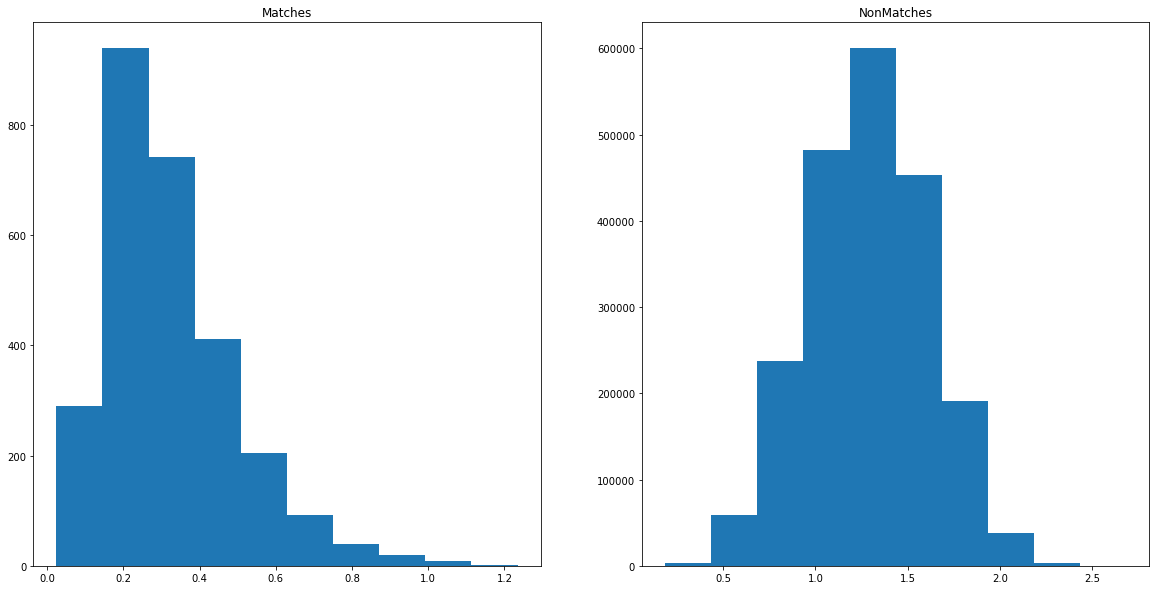

In [91]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].hist(matches)
ax[0].set_title('Matches')
ax[1].hist(nonmatches)
ax[1].set_title('NonMatches')